# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
! wget https://raw.githubusercontent.com/DriveMyScream/Stock_price_prediction/main/Google%20Stock%20Price.csv

--2023-05-12 17:59:42--  https://raw.githubusercontent.com/DriveMyScream/Stock_price_prediction/main/Google%20Stock%20Price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71637 (70K) [text/plain]
Saving to: ‘Google Stock Price.csv’

Google Stock Price. 100%[===================>]  69.96K  --.-KB/s    in 0.009s  

2023-05-12 17:59:42 (7.69 MB/s) - ‘Google Stock Price.csv’ saved [71637/71637]



# data Loading

In [3]:
data_path = "/content/Google Stock Price.csv"
dataset = pd.read_csv(data_path, parse_dates=['Date'])
dataset.head(5)

,Date,Open,High,Low,Close,Volume
0,2023-05-11,115.860,118.440,114.9301,116.900,57115078
1,2023-05-10,108.550,113.510,108.4800,112.280,47533461
2,2023-05-09,108.780,110.595,107.7250,107.940,24782439
3,2023-05-08,105.795,108.420,105.7900,108.240,17266020
4,2023-05-05,105.320,106.440,104.7386,106.215,20710631


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1349 non-null   datetime64[ns]
 1    Open    1349 non-null   float64       
 2    High    1349 non-null   float64       
 3    Low     1349 non-null   float64       
 4    Close   1349 non-null   float64       
 5    Volume  1349 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 63.4 KB


In [9]:
dataset.describe()

,Open,High,Low,Close,Volume
count,1349.000000,1349.000000,1349.000000,1349.000000,1.349000e+03
mean,86.832088,87.840643,85.902540,86.890732,3.093704e+07
std,30.453052,30.762829,30.120076,30.433398,1.344155e+07
min,48.695000,50.177000,48.505500,48.811000,6.935060e+06
25%,58.913000,59.402500,58.287000,58.831500,2.242280e+07
50%,76.259000,78.067500,75.629500,76.101000,2.757826e+07
75%,111.163000,112.750000,109.325500,111.440000,3.512030e+07
max,151.863500,152.100000,149.887500,150.709000,1.241405e+08


In [11]:
dataset.columns

Index(['Date', ' Open', ' High', ' Low', ' Close', ' Volume'], dtype='object')

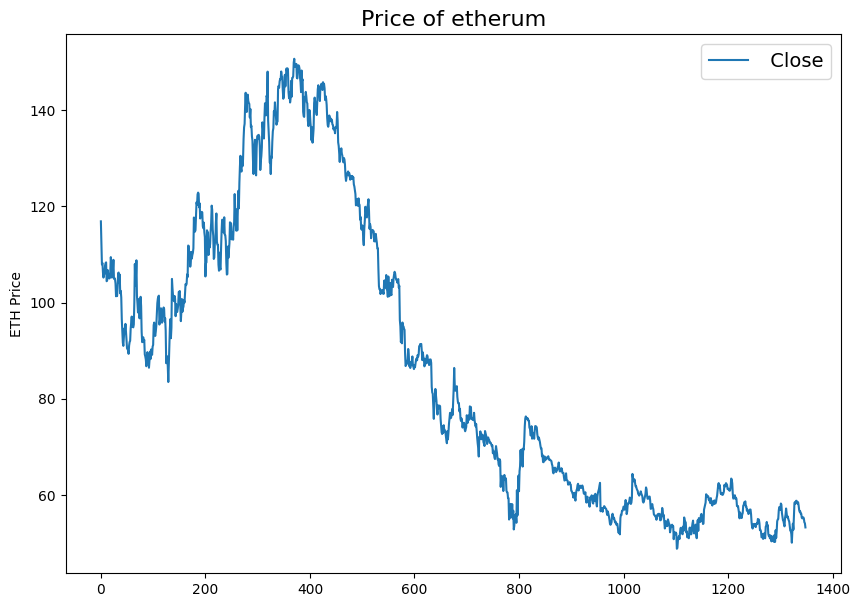

In [12]:
import matplotlib.pyplot as plt
dataset[' Close'].plot(figsize=(10, 7))
plt.ylabel("ETH Price")
plt.title("Price of etherum", fontsize=16)
plt.legend(fontsize=14);

In [13]:
price_data = dataset[' Close'].values
price_data

array([116.9  , 112.28 , 107.94 , ...,  54.32 ,  54.124,  53.25 ])

In [14]:
price_data.shape

(1349,)

In [15]:
train_data, test_data = price_data[0:1200], price_data[1200:]

In [16]:
train_data.shape, test_data.shape

((1200,), (149,))

In [17]:
def windowed_dataset(series, time_step):
    dataX, dataY = [], []
    for i in range(len(series) - time_step - 1):
        a = series[i : i + time_step]  # Remove the indexing with ", 0"
        dataX.append(a)
        dataY.append(series[i + time_step])
        
    return np.array(dataX), np.array(dataY)

In [18]:
X_train, y_train = windowed_dataset(train_data, time_step=7)
X_test, y_test = windowed_dataset(test_data, time_step=7)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1192, 7), (1192,), (141, 7), (141,))

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape) 
print(X_test.shape)

(1192, 7, 1)
(141, 7, 1)


In [21]:
X_train[0]

array([[116.9  ],
       [112.28 ],
       [107.94 ],
       [108.24 ],
       [106.215],
       [105.21 ],
       [106.12 ]])

In [22]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [23]:
# Create the LSTM model
model = models.Sequential()

model.add(layers.Input(shape = (7, 1), dtype=tf.float32))
# Add the Normalization layer
model.add(layers.Normalization())

# Specify the mean and variance for normalization
model.layers[0].adapt(X_train)

model.add(layers.LSTM(units=100, activation='relu', return_sequences=True))
model.add(layers.Dropout(0.3))

model.add(layers.LSTM(units=50, activation='relu', return_sequences=True))
model.add(layers.Dropout(0.4))

model.add(layers.LSTM(units=10, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 7, 1)             3         
 n)                                                              
                                                                 
 lstm (LSTM)                 (None, 7, 100)            40800     
                                                                 
 dropout (Dropout)           (None, 7, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 7, 50)             30200     
                                                                 
 dropout_1 (Dropout)         (None, 7, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 10)                2440      
                                                        

In [25]:
model.compile(optimizer = 'adamax', loss = 'mse', metrics = 'mae')

In [26]:
# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 30, batch_size = 32, verbose=1, shuffle=False)

Epoch 1/30
34/34 [==============================] - 7s 34ms/step - loss: 9806.1436 - mae: 94.6316 - val_loss: 3095.6592 - val_mae: 55.5210
Epoch 2/30
34/34 [==============================] - 1s 19ms/step - loss: 9795.1934 - mae: 94.5705 - val_loss: 3083.6768 - val_mae: 55.4127
Epoch 3/30
34/34 [==============================] - 1s 19ms/step - loss: 9770.5820 - mae: 94.4282 - val_loss: 3041.7720 - val_mae: 55.0314
Epoch 4/30
34/34 [==============================] - 1s 18ms/step - loss: 9624.7207 - mae: 93.4689 - val_loss: 2469.9895 - val_mae: 49.5055
Epoch 5/30
34/34 [==============================] - 1s 19ms/step - loss: 7601.0610 - mae: 77.9552 - val_loss: 390.9371 - val_mae: 17.1469
Epoch 6/30
34/34 [==============================] - 1s 18ms/step - loss: 2852.3525 - mae: 44.8881 - val_loss: 975.6432 - val_mae: 29.5450
Epoch 7/30
34/34 [==============================] - 1s 18ms/step - loss: 2293.6831 - mae: 39.6049 - val_loss: 390.5862 - val_mae: 17.9643
Epoch 8/30
34/34 [============

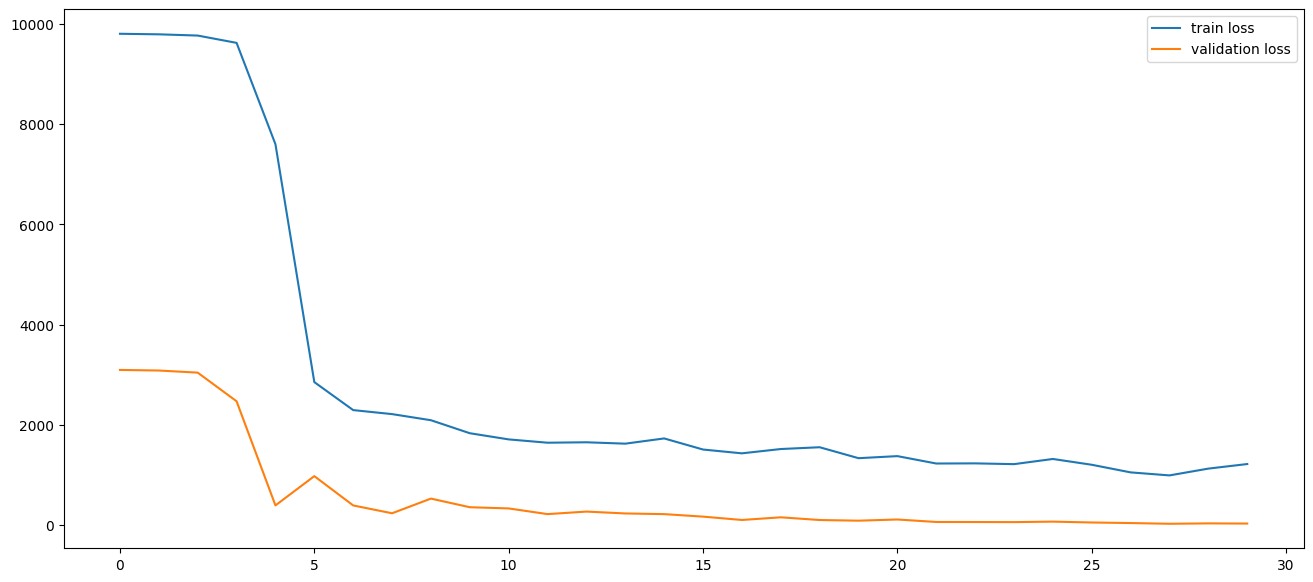

In [27]:
plt.figure(figsize=(16,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.legend();

In [28]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

5/5 [==============================] - 0s 6ms/step


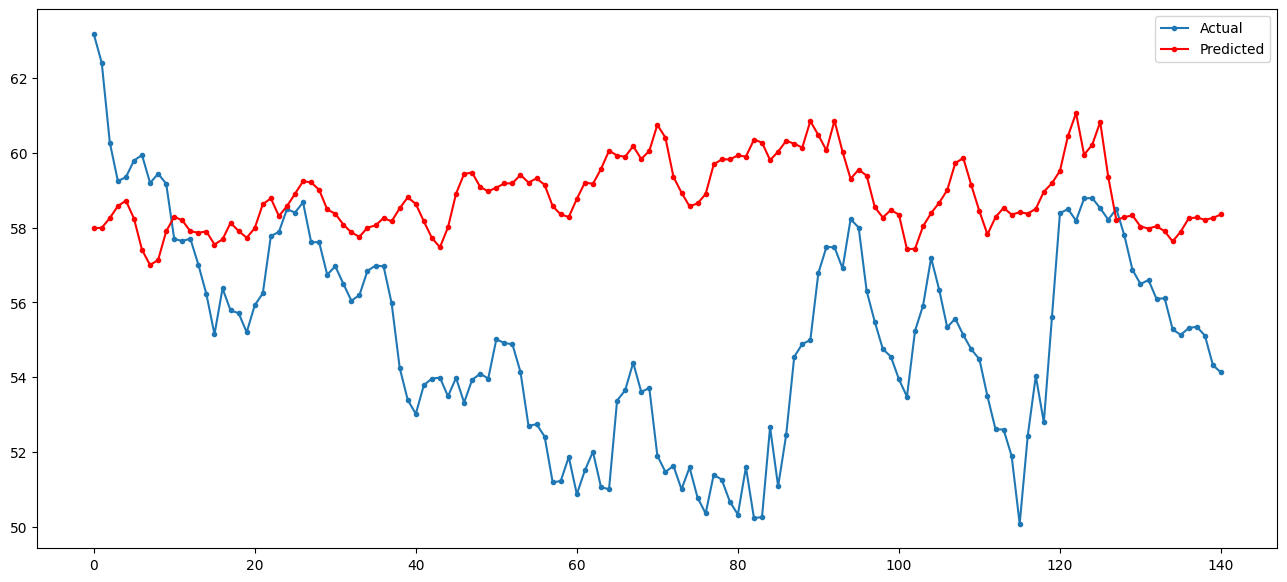

In [29]:
plt.figure(figsize=(16,7))
plt.plot(y_test.flatten(), marker='.', label="Actual")
plt.plot(test_predict.flatten(), 'r', marker='.', label="Predicted")
plt.legend();

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
test_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))
test_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {test_RMSE}")
print(f"Test MAE: {test_MAE}")

Train RMSE: 14.953549273745939
Train MAE: 3.5591773583366755
Test RMSE: 4.834236843727893
Test MAE: 2.0131044901714445


# at Inference

In [31]:
model.save("Google_Stock_Price_Prediction")

In [32]:
import tensorflow as tf
import numpy as np

In [34]:
model = tf.keras.saving.load_model("/content/Google_Stock_Price_Prediction")

In [33]:
%cp -av /content/Google_Stock_Price_Prediction /content/drive/MyDrive/Stock_Price_Prediction

'/content/Google_Stock_Price_Prediction' -> '/content/drive/MyDrive/Stock_Price_Prediction/Google_Stock_Price_Prediction'
'/content/Google_Stock_Price_Prediction/variables' -> '/content/drive/MyDrive/Stock_Price_Prediction/Google_Stock_Price_Prediction/variables'
'/content/Google_Stock_Price_Prediction/variables/variables.data-00000-of-00001' -> '/content/drive/MyDrive/Stock_Price_Prediction/Google_Stock_Price_Prediction/variables/variables.data-00000-of-00001'
'/content/Google_Stock_Price_Prediction/variables/variables.index' -> '/content/drive/MyDrive/Stock_Price_Prediction/Google_Stock_Price_Prediction/variables/variables.index'
'/content/Google_Stock_Price_Prediction/assets' -> '/content/drive/MyDrive/Stock_Price_Prediction/Google_Stock_Price_Prediction/assets'
'/content/Google_Stock_Price_Prediction/fingerprint.pb' -> '/content/drive/MyDrive/Stock_Price_Prediction/Google_Stock_Price_Prediction/fingerprint.pb'
'/content/Google_Stock_Price_Prediction/saved_model.pb' -> '/content/dri

In [36]:
X_test[0].shape

(7, 1)

In [41]:
prices = np.array([[116.9  ],
       [112.28 ],
       [107.94 ],
       [108.24 ],
       [106.215],
       [105.21 ],
       [106.12 ]])

prices = prices.reshape(1, -1, 1)
prediction_price = model.predict(prices)
prediction_price = prediction_price[0][0]
print("Prediction Price: ", prediction_price)

1/1 [==============================] - 0s 26ms/step
Prediction Price:  92.537384


In [44]:
print("Predicted Google Stock Price: {0:.2f} ".format(prediction_price))

Predicted Google Stock Price: 92.54 


In [40]:
tf.__version__

'2.12.0'